In [304]:
import pandas as pd
import math
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import datetime as dt
import networkx as nx
from matplotlib import pylab
import sys
import unittest
import time
import datetime



In [305]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str}, parse_dates=['created_at']
                 )


In [306]:
df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [307]:
# Filter dates
# https://www.codegrepper.com/code-examples/python/pandas+print+row+based+on+condition
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
def filterOutDates(df):
    start_date = '2014-11-12'
    end_date = '2014-12-06'
    mask = (df['created_at'] >= start_date) & (df['created_at'] < end_date)
    return df.loc[mask]


In [308]:
df = filterOutDates(df)


In [309]:
def removeDuplicatesNullRecords(df):
    df = df.drop_duplicates()
    df = df.dropna(axis=0, how='all')
    return df

df = removeDuplicatesNullRecords(df)



In [310]:
reply_df = df[["in_reply_to_user_id_str",
               "in_reply_to_screen_name", "in_reply_to_status_id_str"]]


In [311]:
reply_df


,in_reply_to_user_id_str,in_reply_to_screen_name,in_reply_to_status_id_str
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
77302,NaN,NaN,NaN
77303,NaN,NaN,NaN
77304,NaN,NaN,NaN
77305,NaN,NaN,NaN


In [312]:
# reply
def isreply(tweet):
    if not pd.isna(tweet):
        print(tweet)


In [313]:
total_replies = df[pd.notna(df["in_reply_to_user_id_str"])]  # replies


In [314]:
len(total_replies.index)  # amount of replies


1724

In [315]:
# print all replies
replies = reply_df["in_reply_to_user_id_str"].map(isreply)


11348282
19442947
253536357
253536357
64643056
33602654
1691515789
19402238
529722897
2294593507
41333964
253536357
66162716
59220577
253536357
1273487113
253536357
17842366
26030180
24129206
14526045
21436960
1969346438
253536357
253536357
2232463302
1438925534
15808765
472670056
2590415228
254659730
17384099
177594666
46959037
32520240
443080433
412396499
208442526
86070159
21436960
253536357
253536357
253536357
253536357
208442526
35233873
376790816
404818828
14800111
622113
1266281
2294593507
372434360
329600057
972651
208442526
168090600
246693449
27650674
208442526
1941637627
43024906
86336234
208442526
19903360
2868449663
47306483
371152085
2894572724
106442779
208442526
364423298
253536357
43024906
85751142
208442526
4620451
3108351
41712825
75052666
5402612
2254751592
629637909
21584325
110462645
208442526
5402612
14606395
208442526
75052666
1041442471
119473816
1435461
208442526
229632990
75052666
34800396
32498911
18505048
208442526
208442526
129673790
75052666
114085696
673

In [316]:
def getAllReplies(df):
    total_replies_df = df[pd.notna(df['in_reply_to_user_id_str'])]
    return total_replies_df

def getAllRetweets(df):
    nan_reply_user_id_df = df[pd.isna(df['in_reply_to_user_id_str'])]
    retweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
        lambda x: True if re.search("^RT @.*", x)else False)]
    return retweet_only_df

def getAllTweets(df):
    nan_reply_user_id_df = df[pd.isna(df['in_reply_to_user_id_str'])]
    tweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
        lambda x: False if re.search("^RT @.*", x)else True)]
    return tweet_only_df
    
total_replies_df = getAllReplies(df)

retweet_only_df = getAllRetweets(df)

tweet_only_df = getAllTweets(df)

In [317]:
def getAllRetweetReplies(total_replies_df):
    retweet_replies = total_replies_df[total_replies_df['text'].apply(
        lambda x: True if re.search('^RT @.*', x) else False)]
    return retweet_replies

def getAllTweetReplies(total_replies_df):
    tweet_replies = total_replies_df[total_replies_df['text'].apply(
        lambda x: False if re.search('^RT @.*', x) else True)]
    return tweet_replies

retweet_replies = getAllRetweetReplies(total_replies_df)

tweet_replies = getAllTweetReplies(total_replies_df)

In [318]:
retweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
5,540928707947671555,MBernacconi,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:00:28+00:00,NaN,en,NaN,NaN,47907492,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5331943059...,317,478,http://twitter.com/MBernacconi/statuses/540928...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,532460149668343808,m0cvo,RT @ConversationUK: BREAKING: Philae lander ha...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,103211582,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5001938819...,1430,845,http://twitter.com/m0cvo/statuses/532460149668...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Android Tablets,Twitter
77301,532460149215350784,ipanice,RT @esa: '@Philae2014 is gone - it's on its pa...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,39744088,NaN,"<a href=""http://itunes.apple.com/us/app/twitte...",http://pbs.twimg.com/profile_images/1667935129...,157,350,http://twitter.com/ipanice/statuses/5324601492...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Mac,Twitter
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter


In [319]:
tweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
6,540928513906589696,LukeGolds,USA Â» NEWS Â» HOT NEWS 828 comet landing Phi...,2014-12-05 17:59:42+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092851...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
9,540925590111789056,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,NaN,en,NaN,NaN,17680518,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for iPhone,Twitter
10,540925056533413888,EUCouncil,After the #CometLanding - Astronaut @astro_luc...,2014-12-05 17:45:58+00:00,NaN,en,NaN,NaN,206717989,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4838611162...,52050,360,http://twitter.com/EUCouncil/statuses/54092505...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
11,540924908797448193,LukeGolds,USA Â» NEWS Â» HOT NEWS 534 comet landing The...,2014-12-05 17:45:22+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092490...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77287,532460156567580672,JoeGrish1,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2387053214,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4441120804...,173,38,http://twitter.com/JoeGrish1/statuses/53246015...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77290,532460155859120128,charliecbs,It will take seven hours for the #probe to fal...,2014-11-12 09:09:28+00:00,NaN,en,NaN,NaN,169495645,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000006...,2163,66,http://twitter.com/charliecbs/statuses/5324601...,"{""hashtags"":[{""text"":""probe"",""indices"":[33,39]...",Twitter for iPhone,Twitter
77297,532460154482999296,worldbreakingn,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2309819160,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4270311610...,532,472,http://twitter.com/worldbreakingn/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android


In [320]:
len(retweet_replies.index)  # replies that contain retweets


30

In [321]:
len(tweet_replies.index)  # replying other tweets


1694

In [322]:
retweet_total = df[df['text'].apply(
    lambda x: True if re.search('^RT @.*', x) else False)]
tweet_total = df[df['text'].apply(
    lambda x: False if re.search('^RT @.*', x) else True)]


In [323]:
len(retweet_total.index)  # Total retweets


59959

In [324]:
len(tweet_total.index)  # Total tweets


17348

In [325]:
retweet_only = len(retweet_total.index) - len(retweet_replies.index)


In [326]:
tweet_only = len(tweet_total.index) - len(tweet_replies.index)


In [327]:
replies_only = len(total_replies.index)


In [328]:
len(retweet_only_df)


59929

In [329]:
tweet_only


15654

In [330]:
len(tweet_only_df)


15654

In [331]:
replies_only


1724

In [332]:
len(total_replies_df)


1724

In [333]:
def getNoOfUniqueUsers(df):
    #user_ids = df["from_user_id_str"].unique()
    #len(retweet_only_df["from_user_id_str"].unique())
    average_different_users_tweet = df.groupby(
    ["from_user_id_str"]).agg(["count"])["from_user"]
    average_different_users_tweet.mean()
    average_different_users_tweet.sort_values(by="count", ascending=False)
    man = average_different_users_tweet["count"].tolist()  # manual
    return len(man)


In [334]:
uniqueUsers = getNoOfUniqueUsers(df)

In [335]:
average_retweets_by_a_user = len(retweet_only_df) / uniqueUsers 
average_tweets_by_a_user = len(tweet_only_df) / uniqueUsers
average_replies_by_a_user = len(total_replies_df) / uniqueUsers


In [336]:
print("Average retweets by a user: " + str(average_retweets_by_a_user))
print("Average tweets by a user: " + str(average_tweets_by_a_user)) #(excluding retweets and replies)
print("Average replies by a user: " + str(average_replies_by_a_user))


Average retweets by a user: 1.193424406563645
Average tweets by a user: 0.3117333120917636
Average replies by a user: 0.034331687111677556


In [337]:
def findDevice(src):
    if (pd.isna(src)):
        return "Unknown"
    elif (re.search('iphone', src) != None):
        return "IOS"
    elif (re.search('ipad', src) != None):
        return "IOS"
    elif (re.search('android', src) != None):
        return "Android"
    else:
        return "Unknown"


def getDevice(row, ds):
    user = row['from_user_id_str']
    src = row['source']
    dev = findDevice(row['source'])
    if dev != 'Unknown':
        curDev = ds.setdefault(user, set())
        curDev.add(dev)
        ds.update({user: curDev})


def ctDevices(df):
    ds = dict()
    df.apply(lambda row: getDevice(row, ds), axis=1)
    return ds


In [338]:
def devicesChart(df):
    devices = ctDevices(df).values()
    ios = len([x for x in devices if x == {"IOS"}])
    android = len([x for x in devices if x == {"Android"}])
    both = len([x for x in devices if x == {"IOS", "Android"}])
    total = len({x for x in set(df['from_user_id_str']) if pd.notna(x)})
    unknown = total - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = [f"IOS only: {ios} ({round(ios/total*100, 2)}%)",
                  f"Android only: {android} ({round(android/total*100, 2)}%)",
                  f"Both IOS and Android: {both} ({round(both/total*100, 2)}%)",
                  f"Unknown: {unknown} ({round(unknown/total*100, 2)}%)"]
    # https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
    patches, texts = plt.pie(dev_num)
    plt.legend(patches, dev_labels, loc="lower left")
    plt.show()


In [339]:
def getListOfAllHashTags():
    # Open JSON file.
    with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)

    # List of hashtags found
    hashtagsFull = []

    # Gets list of hashtags from JSON file.
    for j in json_load:
        for i in j['hashtags']:
            hashtagsFull.append(i['text'])
    json_file.close()
    return hashtagsFull


def getListOfUniqueHashtags(hashtagsFull):
    # Gets unique hashtags.
    hashtagsUnique = pd.Series(hashtagsFull)
    hashtagsUnique = hashtagsUnique.unique()

    for index, i in enumerate(hashtagsUnique):
        if(i == "CometLanding"):
            hashtagsUnique[index] = ""
            break

    return hashtagsUnique


def createDataFrameOfHashtagsAndFills(hashtagsUnique, hashtagsFull):
    # Creates dataframe.
    data = {'Hashtags': hashtagsUnique, 'Frequency': [0] * len(hashtagsUnique)}
    df = pd.DataFrame(data)

    # Finds frequency of each hashtag found.
    for i in hashtagsFull:
        for index, j in enumerate(df['Hashtags']):
            if(i == j):
                df['Frequency'][index] += 1

    # Sort values to descending.
    df = df.sort_values(['Frequency'], ascending=False)
    return df


def printData(hashtagDataFrame):
    # Print dataframe.
    print(hashtagDataFrame)

# Example usage
#allHashtags = getListOfAllHashTags()
#uniqueHashtags = getListOfUniqueHashtags(allHashtags)
#hashtagData = createDataFrameOfHashtagsAndFills(uniqueHashtags, allHashtags)
# printData(hashtagData)

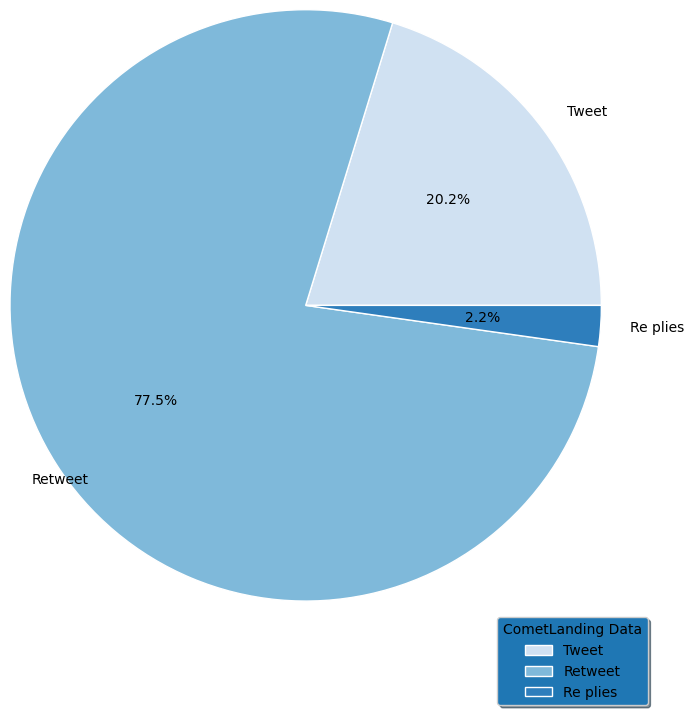

In [340]:
# https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.legend.html

# data
x = [len(tweet_only_df), len(retweet_only_df), len(total_replies_df)]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(3, 3), labels=["Tweet", "Retweet", "Re plies"],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
       autopct="%1.1f%%")

legend = ax.legend(loc='best', bbox_to_anchor=(1, -0.6, 0.5, 0.5),
                   shadow=True, fontsize='medium', title="CometLanding Data")


# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()


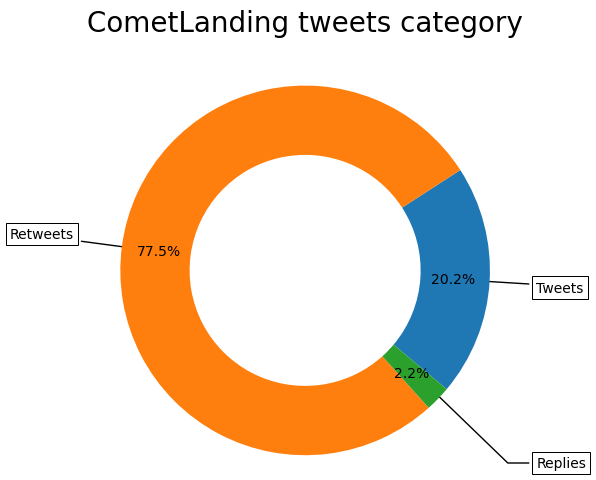

In [341]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = ["Tweets",
         "Retweets",
         "Replies"]

data = [len(tweet_only_df), len(retweet_only_df), len(total_replies_df)]

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%", pctdistance=0.8,
                                  radius=2, center=(0, 0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("CometLanding tweets category", y=1.5,
             fontdict={"fontsize": 20})

plt.show()


In [342]:
date_raw = df[df['created_at'].apply(
    lambda x: True if re.search('^2014-11-12', str(x)) else False)]


In [343]:
type(date_raw)


pandas.core.frame.DataFrame

In [344]:
date = date_raw.set_index('created_at').groupby(pd.Grouper(freq='H'))


In [345]:
date.count()["id_str"]


created_at
2014-11-12 09:00:00+00:00    9819
2014-11-12 10:00:00+00:00    5240
2014-11-12 11:00:00+00:00    5827
2014-11-12 12:00:00+00:00    6362
2014-11-12 13:00:00+00:00    5159
2014-11-12 14:00:00+00:00    2103
2014-11-12 15:00:00+00:00    5715
2014-11-12 16:00:00+00:00    5915
2014-11-12 17:00:00+00:00    5910
2014-11-12 18:00:00+00:00    5903
2014-11-12 19:00:00+00:00    3529
2014-11-12 20:00:00+00:00    3776
2014-11-12 21:00:00+00:00    2116
2014-11-12 22:00:00+00:00    4508
2014-11-12 23:00:00+00:00    1369
Freq: H, Name: id_str, dtype: int64

In [346]:
date_labels = [str(ts.strftime("%H"))
               for ts in date.count()["id_str"].index.tolist()]


In [347]:
date_data = date.count()["id_str"].tolist()


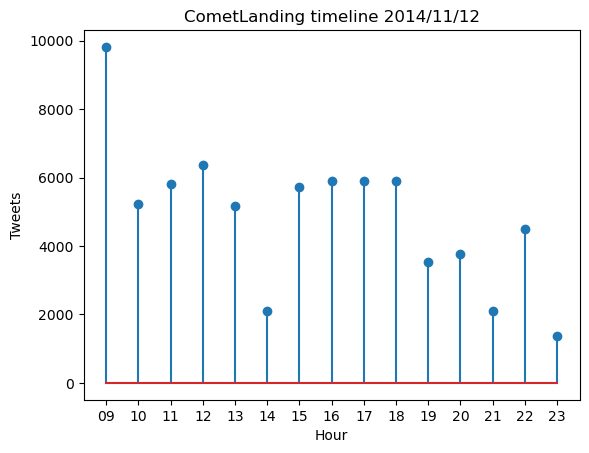

In [348]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/stem_plot.html
y = date_data
x = date_labels

plt.title("CometLanding timeline 2014/11/12")
plt.xlabel("Hour")
plt.ylabel("Tweets")

plt.stem(x, y)
plt.show()


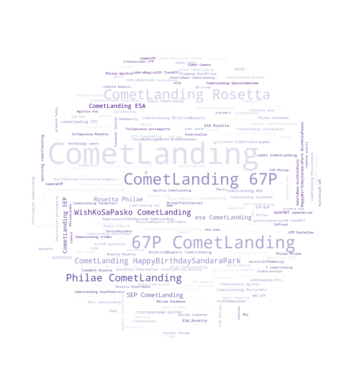

In [349]:
def createWordCloud(allHashtags):
    mask = np.array(Image.open('../data/mask.jpg'))
    text = " ".join(x.split()[0] for x in allHashtags)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 12000,
                          height = 9000,
                          #max_words = 200,
                          colormap = 'Purples',
                          mask = mask,
                          background_color = 'white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file('../images/wordCloud.png')

# Not sure if CometLanding hashtag should be in cloud but it can be searched for in the file and removed before creating wordcloud.
# Example usage
createWordCloud(getListOfAllHashTags())


In [350]:
df['applications'].unique()

array(['Twitter', 'IFTTT', 'Buffer', 'TweetDeck', 'AllFilmBot',
       'Tweetbot for Mac', 'Gwittr Writer', 'dlvr.it', 'Hootsuite',
       'GatorBot', 'Mobile Web (M5)', 'Tweetbot for iÎŸS', 'Instagram',
       'my-app-z', 'Mobile Web (M2)', 'HubSpot', 'TweetAdder v4',
       'Echofon', 'OS X', 'Google', 'TweetCaster for Android',
       'Carbon for Android', 'Dat post', '423Diotima', 'iOS', 'Flipboard',
       'PlumeÂ\xa0forÂ\xa0Android', 'botly', 'MetroTwit', 'YoruFukurou',
       'Favstar.FM', 'RNAutoRetweet', ' Tweedle', 'Sprout Social',
       'RoundTeam', 'ScienceApp', 'Crowdbooster', 'SocialChorus',
       'Tweetium for Windows', 'twicca', 'SemanticEarth',
       'Twidere for Android #2', 'Microsoft SMB', 'Facebook',
       'TheWorld for iOS', 'Tumblr', 'feedly cloud', 'TTYtter', 'Polly',
       'twittbot.net', 'Tweetings for Android', 'twi_api_for_farm',
       'Post with Klout', 'Tweetian for Sailfish OS', 'yoono', 'Seesmic',
       'BBotMaker - Bot Ã\xa0 mots-clÃ©s', 'Choqok'

In [351]:
spec_app_raw = df.groupby(["specific_applications"]).agg(["count"])["id_str"]
app_raw = df.groupby(["applications"]).agg(["count"])["id_str"]

In [352]:
spec_app_sorted = spec_app_raw.sort_values(by="count",ascending=False)
app_sorted = app_raw.sort_values(by="count",ascending=False)

In [353]:
spec_app_raw

,count
specific_applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [354]:
spec_app_sorted

,count
specific_applications,
Twitter Web Client,27943
Twitter for iPhone,13750
Twitter for Android,12773
TweetDeck,4081
Twitter for iPad,3283
...,...
Tweet Offers,1
Tweet-this-page,1
MalelErkin,1


In [355]:
app_raw

,count
applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [356]:
app_sorted

,count
applications,
Twitter,62860
TweetDeck,4081
dlvr.it,1671
Tweetbot for iÎŸS,1055
Tweet Old Post,925
...,...
LF_ShindongSJd app,1
KuroTwi,1
KunzBot,1


In [357]:
top6_withdev = spec_app_sorted.head(6)["count"]
top6_app = app_sorted.head(6)["count"]

In [358]:
others_count = spec_app_sorted.sum() - spec_app_sorted.head(6).sum()
others_dict = {"Others": others_count[0]}
others = pd.Series(data=others_dict)
top7_withdev = pd.concat([top6_withdev, others]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [359]:
others_count_app = app_sorted.sum() - app_sorted.head(6).sum()
others_dict_app = {"Others": others_count_app[0]}
others_app = pd.Series(data=others_dict_app)
top7_app = pd.concat([top6_app, others_app]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [360]:
top7_withdev

Twitter Web Client     27943
Twitter for iPhone     13750
Twitter for Android    12773
TweetDeck               4081
Twitter for iPad        3283
dlvr.it                 1671
Others                 13806
dtype: int64

In [361]:
top7_app

Twitter              62860
TweetDeck             4081
dlvr.it               1671
Tweetbot for iÎŸS     1055
Tweet Old Post         925
Hootsuite              799
Others                5916
dtype: int64

In [362]:
others_count_app

count    5916
dtype: int64

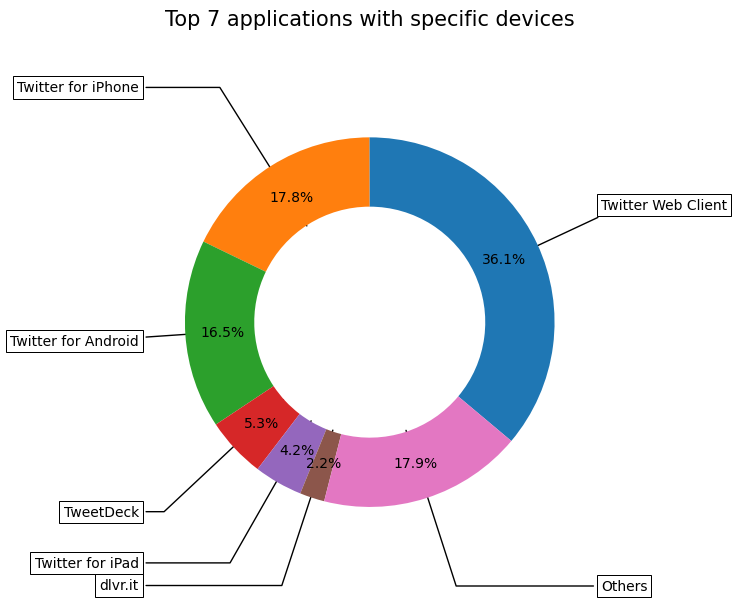

In [363]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = top7_withdev.keys().tolist()

data = top7_withdev.values.tolist()

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%",pctdistance=0.8, 
                                  radius=2, center=(0,0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 7 applications with specific devices",y=1.75,
             fontdict = {"fontsize":15})

plt.show()

TypeError: set_ticks() got an unexpected keyword argument 'labels'

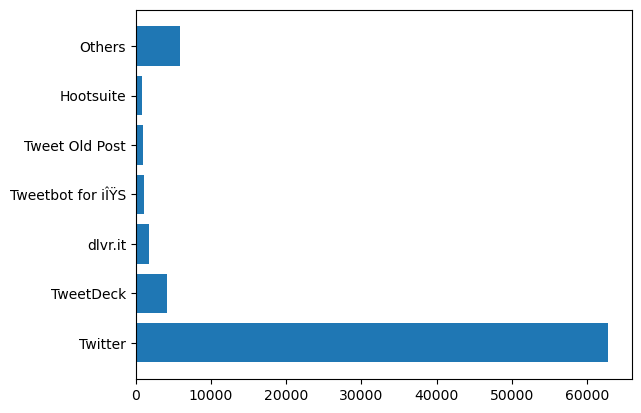

In [364]:
# https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib

label = top7_app.keys().tolist()

data = top7_app.values.tolist()


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = label
ax.barh(y_pos, data, align='center')
ax.set_yticks(y_pos, labels=label)
ax.invert_yaxis()  
ax.set_xlabel('Usage')
ax.set_title('Top 7 applications')

total = df["applications"].size

#Percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    percentage = '{:.1f}%'.format(100*p.get_width()/total)# change it to .11f to make it more specific
    x, y = p.get_xy() 
    ax.annotate(percentage, (x, y + height*1.02), ha='right')


plt.show()

In [365]:
df["applications"].size

77307

In [366]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str}, parse_dates=['created_at']
                 )

In [403]:
class Tests(unittest.TestCase):
   # Test on if filtering of dates is functioning properly.
   def test_one(self):
      start_date = time.mktime(datetime.datetime.strptime('2014/11/12', "%Y/%m/%d").timetuple())
      end_date = time.mktime(datetime.datetime.strptime('2014/12/06', "%Y/%m/%d").timetuple())
      dfTest = filterOutDates(df)
      for date in dfTest['created_at']:
          self.assertEqual(True, (date.timestamp() >= start_date))
          self.assertEqual(True, (date.timestamp() < end_date))
   pass
      
   # Test on if filtering of duplicates and null records is functioning properly.
   def test_two(self):
      noOfRecordsBefore = len(df)
      dfTest = removeDuplicatesNullRecords(df)
      noOfRecordsAfter = len(dfTest)
      self.assertEqual(noOfRecordsBefore, noOfRecordsAfter)
   pass

   # Test on if only replies can be found.
   def test_three(self):
      replies = getAllReplies(df)
      for i in replies['in_reply_to_user_id_str']:
         self.assertEqual(True, pd.notna(i))
   pass

   # Test on if all retweets can be found.
   def test_four(self):
      retweets = getAllRetweets(df)
      for i in retweets['text']:
         self.assertEqual(True, i.startswith("RT @"))
   pass

   # Test on if all tweets can be found.
   def test_five(self):
      tweets = getAllTweets(df)
      for i in tweets['text']:
         self.assertEqual(False, i.startswith("RT @"))
   pass

   # Test on if only retweet replies can be found.
   def test_six(self):
      retweet_replies = getAllRetweetReplies(getAllReplies(df))
      for i in retweet_replies['in_reply_to_user_id_str']:
         self.assertEqual(True, pd.notna(i))
      for i in retweet_replies['text']:
         self.assertEqual(True, i.startswith("RT @"))
   pass

   # Test on if only tweet replies can be found.
   def test_seven(self):
      tweet_replies = getAllTweetReplies(getAllReplies(df))
      for i in tweet_replies['in_reply_to_user_id_str']:
         self.assertEqual(True, pd.notna(i))
      for i in tweet_replies['text']:
         self.assertEqual(False, i.startswith("RT @"))
   pass

   # Test that all replies are kept when they are split.
   def test_eight(self):
      replies = getAllReplies(df)
      tweet_replies = getAllTweetReplies(replies)
      retweet_replies = getAllRetweetReplies(replies)
      self.assertEqual(len(replies), len(tweet_replies) + len(retweet_replies))
   pass

   # Test that unique users amount is found.
   def test_nine(self):
      uniqueUsers = getNoOfUniqueUsers(df)
      uniqueUsersTest = len(df["from_user_id_str"].unique())
      self.assertEqual(uniqueUsers, uniqueUsersTest)
   pass


In [404]:
def suite():
 loader = unittest.TestLoader()
 testsuite = loader.loadTestsFromTestCase(Tests)
 return testsuite

In [405]:
def test():
 testsuite = suite()
 runner = unittest.TextTestRunner(sys.stdout, verbosity=2)
 result = runner.run(testsuite)

In [406]:
test()

test_eight (__main__.Tests) ... ok
test_five (__main__.Tests) ... ok
test_four (__main__.Tests) ... ok
test_nine (__main__.Tests) ... ok
test_one (__main__.Tests) ... ok
test_seven (__main__.Tests) ... ok
test_six (__main__.Tests) ... ok
test_three (__main__.Tests) ... ok
test_two (__main__.Tests) ... ok

----------------------------------------------------------------------
Ran 9 tests in 2.084s

OK


In [407]:


# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
#Network X

# replies_network = nx.Graph()
# seenNodes_replies = set()

# for index, row in total_replies_df.iterrows():
#     node_1 = row['in_reply_to_screen_name']
#     if node_1 not in seenNodes_replies and node_1 is not None:
#         replies_network.add_node(node_1)
#         seenNodes_replies.add(node_1)
        
#     node_2 = row['from_user']
#     if node_2 not in seenNodes_replies and node_2 is not None :
#         replies_network.add_node(node_2)
#         seenNodes_replies.add(node_2)
        
#     replies_network.add_edge(node_1,node_2)
  
    
#     print(row['in_reply_to_screen_name'], row['from_user'])



In [408]:
retweet_network = nx.Graph()
seenNodes_retweet = set()
# retweet_list = retweet_only_df['text'].apply(lambda x: x.split(":")[0][2:]) # slice and split to get retweet users



for index, row in retweet_only_df.iterrows():
    node_1 = row["from_user"]
    if node_1 not in seenNodes_retweet and node_1 is not None:
        retweet_network.add_node(node_1)
        seenNodes_replies.add(node_1)
        
    node_2 = row["text"].split(":")[0][2:]
    if node_2 not in seenNodes_retweet and node_2 is not None:
        retweet_network.add_node(node_2)
        seenNodes_replies.add(node_2)
    
    retweet_network.add_edge(node_1,node_2)

NameError: name 'seenNodes_replies' is not defined

In [ ]:
mentions_network = nx.Graph()
seenNodes_mentions = set()

# for index, row in df.iterrows():
    
#     node_1 = row["from_user"]
#     if node_1 not in seenNodes_mentions and node_1 is not None:
#         mentions_network.add_node(node_1)
#         seenNodes_mentions.add(node_1)
        
#     node_2 = row["text"]
#     match = re.search("@[A-Za-z0-9_]* ", node_2)
#     if match:
#         if match.group() not in seenNodes_mentions and match.group() is not None:
#             mentions_network.add_node(match.group())
#             seenNodes_mentions.add(match.group())
        
#         if match.group() == "@EUCouncil":
#             print(match.group())
            
#         mentions_network.add_edge(node_1,match.group())

In [ ]:
# https://stackoverflow.com/questions/17381006/large-graph-visualization-with-python-and-networkx
# def save_graph(graph,file_name):
#     #initialze Figure
#     plt.figure(num=None, figsize=(800,800), dpi=80)
#     plt.axis('off')
#     fig = plt.figure(1)
#     pos = nx.spring_layout(graph)
#     nx.draw_networkx_nodes(graph,pos)
#     nx.draw_networkx_edges(graph,pos, edge_color="r")
#     nx.draw_networkx_labels(graph,pos)

#     cut = 1.00
#     xmax = cut * max(xx for xx, yy in pos.values())
#     ymax = cut * max(yy for xx, yy in pos.values())
#     plt.xlim(-1*xmax, xmax)
#     plt.ylim(-1*ymax, ymax)

#     plt.savefig(file_name)
#     pylab.close()
#     del fig
    
# save_graph(replies_network,"../images/replies_network.pdf")
# save_graph(retweet_network,"../images/retweet_network.pdf")
# save_graph(mentions_network,"../images/mentions_network.pdf")

In [ ]:

date_raw2 = df

In [ ]:


day = date_raw2.set_index('created_at').groupby(pd.Grouper(freq='D'))



In [ ]:


day_labels = [str(ts.strftime("%d/%m"))
               for ts in day.count()["id_str"].index.tolist()]


day_data = day.count()["id_str"].tolist()




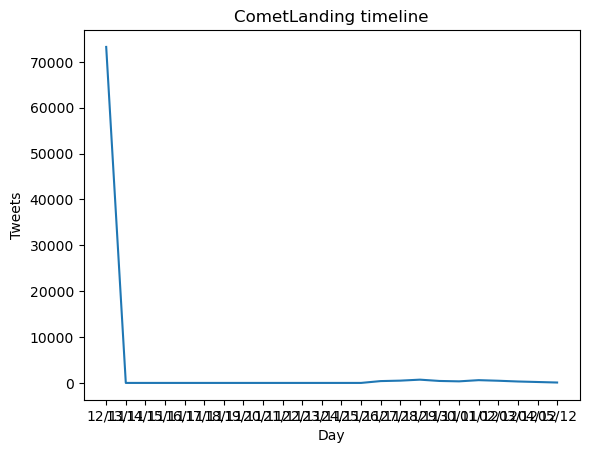

In [ ]:
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
y = day_data
x = day_labels

plt.title("CometLanding timeline")
plt.xlabel("Day")
plt.ylabel("Tweets")

plt.plot(x, y)
plt.rcParams["figure.figsize"] = (20,30)
plt.show()